In [18]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import os
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import re
import string
from nltk import ngrams
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
strDataDir = '/project/hackathon/hackers09/hack095/NOVEL-CLINICAL-PREDICTION-APPROACHES-TO-MANAGING-CARE-FOR-ACUTE-PULMONARY-EMBOLISM-PATIENTS/'
strMergedCsv = os.path.join(strDataDir, 'enc_outcome_echo.csv')

In [43]:
dfMerged = pd.read_csv(strMergedCsv, index_col=0)

In [57]:
def preproc_string(strInput):
    strInput = strInput.lower() # to lower case
    # remove punctuation
    strInput = re.sub(r'[^A-Za-z0-9 ]+', '', strInput)
    # remove stop words
    exclude = ENGLISH_STOP_WORDS
    strInput = ' '.join(ch for ch in strInput.split() if ch not in exclude)

    return strInput

In [89]:
def get_max_fuzz(strInput, nGram, objFuzzFunction, strCompare):
    tokens = word_tokenize(strInput)
    lsThreegrams = list(ngrams(tokens, nGram))
    nMaxFuzz = 0
    for tupGram in lsThreegrams:
        strGram = ' '.join(tupGram)
        nTempFuzz = objFuzzFunction(strGram, strCompare)
        if nTempFuzz > nMaxFuzz:
            nMaxFuzz = nTempFuzz
            
    return nMaxFuzz

In [61]:
lsEchoCategories = ['no dilation', 'normal dilation', 'mild dilation', 
                    'min dilation', 'mod dilation', 'severe dilation',
                    'normal function', 'no function', 'mild function', 'min function', 
                    'mod function', 'severe function', 'mcconnell sig', 'lv function']

In [90]:
dfEchoFuzzy = pd.DataFrame(columns=['NARRATIVE_compiled']+lsEchoCategories,
                           index=dfMerged.index)
dfEchoFuzzy['NARRATIVE_compiled'] = dfMerged['NARRATIVE_compiled'].fillna('').transform(preproc_string)

In [91]:
for nEnc in dfEchoFuzzy.index:
    strNarrative = dfEchoFuzzy.at[nEnc, 'NARRATIVE_compiled']
    for strCol in lsEchoCategories:            
        dfEchoFuzzy.at[nEnc, strCol] = get_max_fuzz(strNarrative, 3, fuzz.ratio, strCol)

In [93]:
dfEchoFuzzy.head()

,NARRATIVE_compiled,no dilation,normal dilation,mild dilation,min dilation,mod dilation,severe dilation,normal function,no function,mild function,min function,mod function,severe function,mcconnell sig,lv function
HSP_ENC,,,,,,,,,,,,,,,
260755660,study date 04082017 reason study shortness bre...,51,67,59,53,53,54,67,64,69,69,65,75,46,73
192470437,,0,0,0,0,0,0,0,0,0,0,0,0,0,0
258754156,,0,0,0,0,0,0,0,0,0,0,0,0,0,0
306050512,study date 06252018 reason study tachycardia u...,72,69,67,69,69,69,75,69,64,67,67,83,54,77
163297609,,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
iris = sns.load_dataset("iris")

In [105]:
dfPlot = dfMerged['b48hr'].fillna(0).to_frame()
dfPlot[lsEchoCategories] = dfEchoFuzzy[lsEchoCategories]

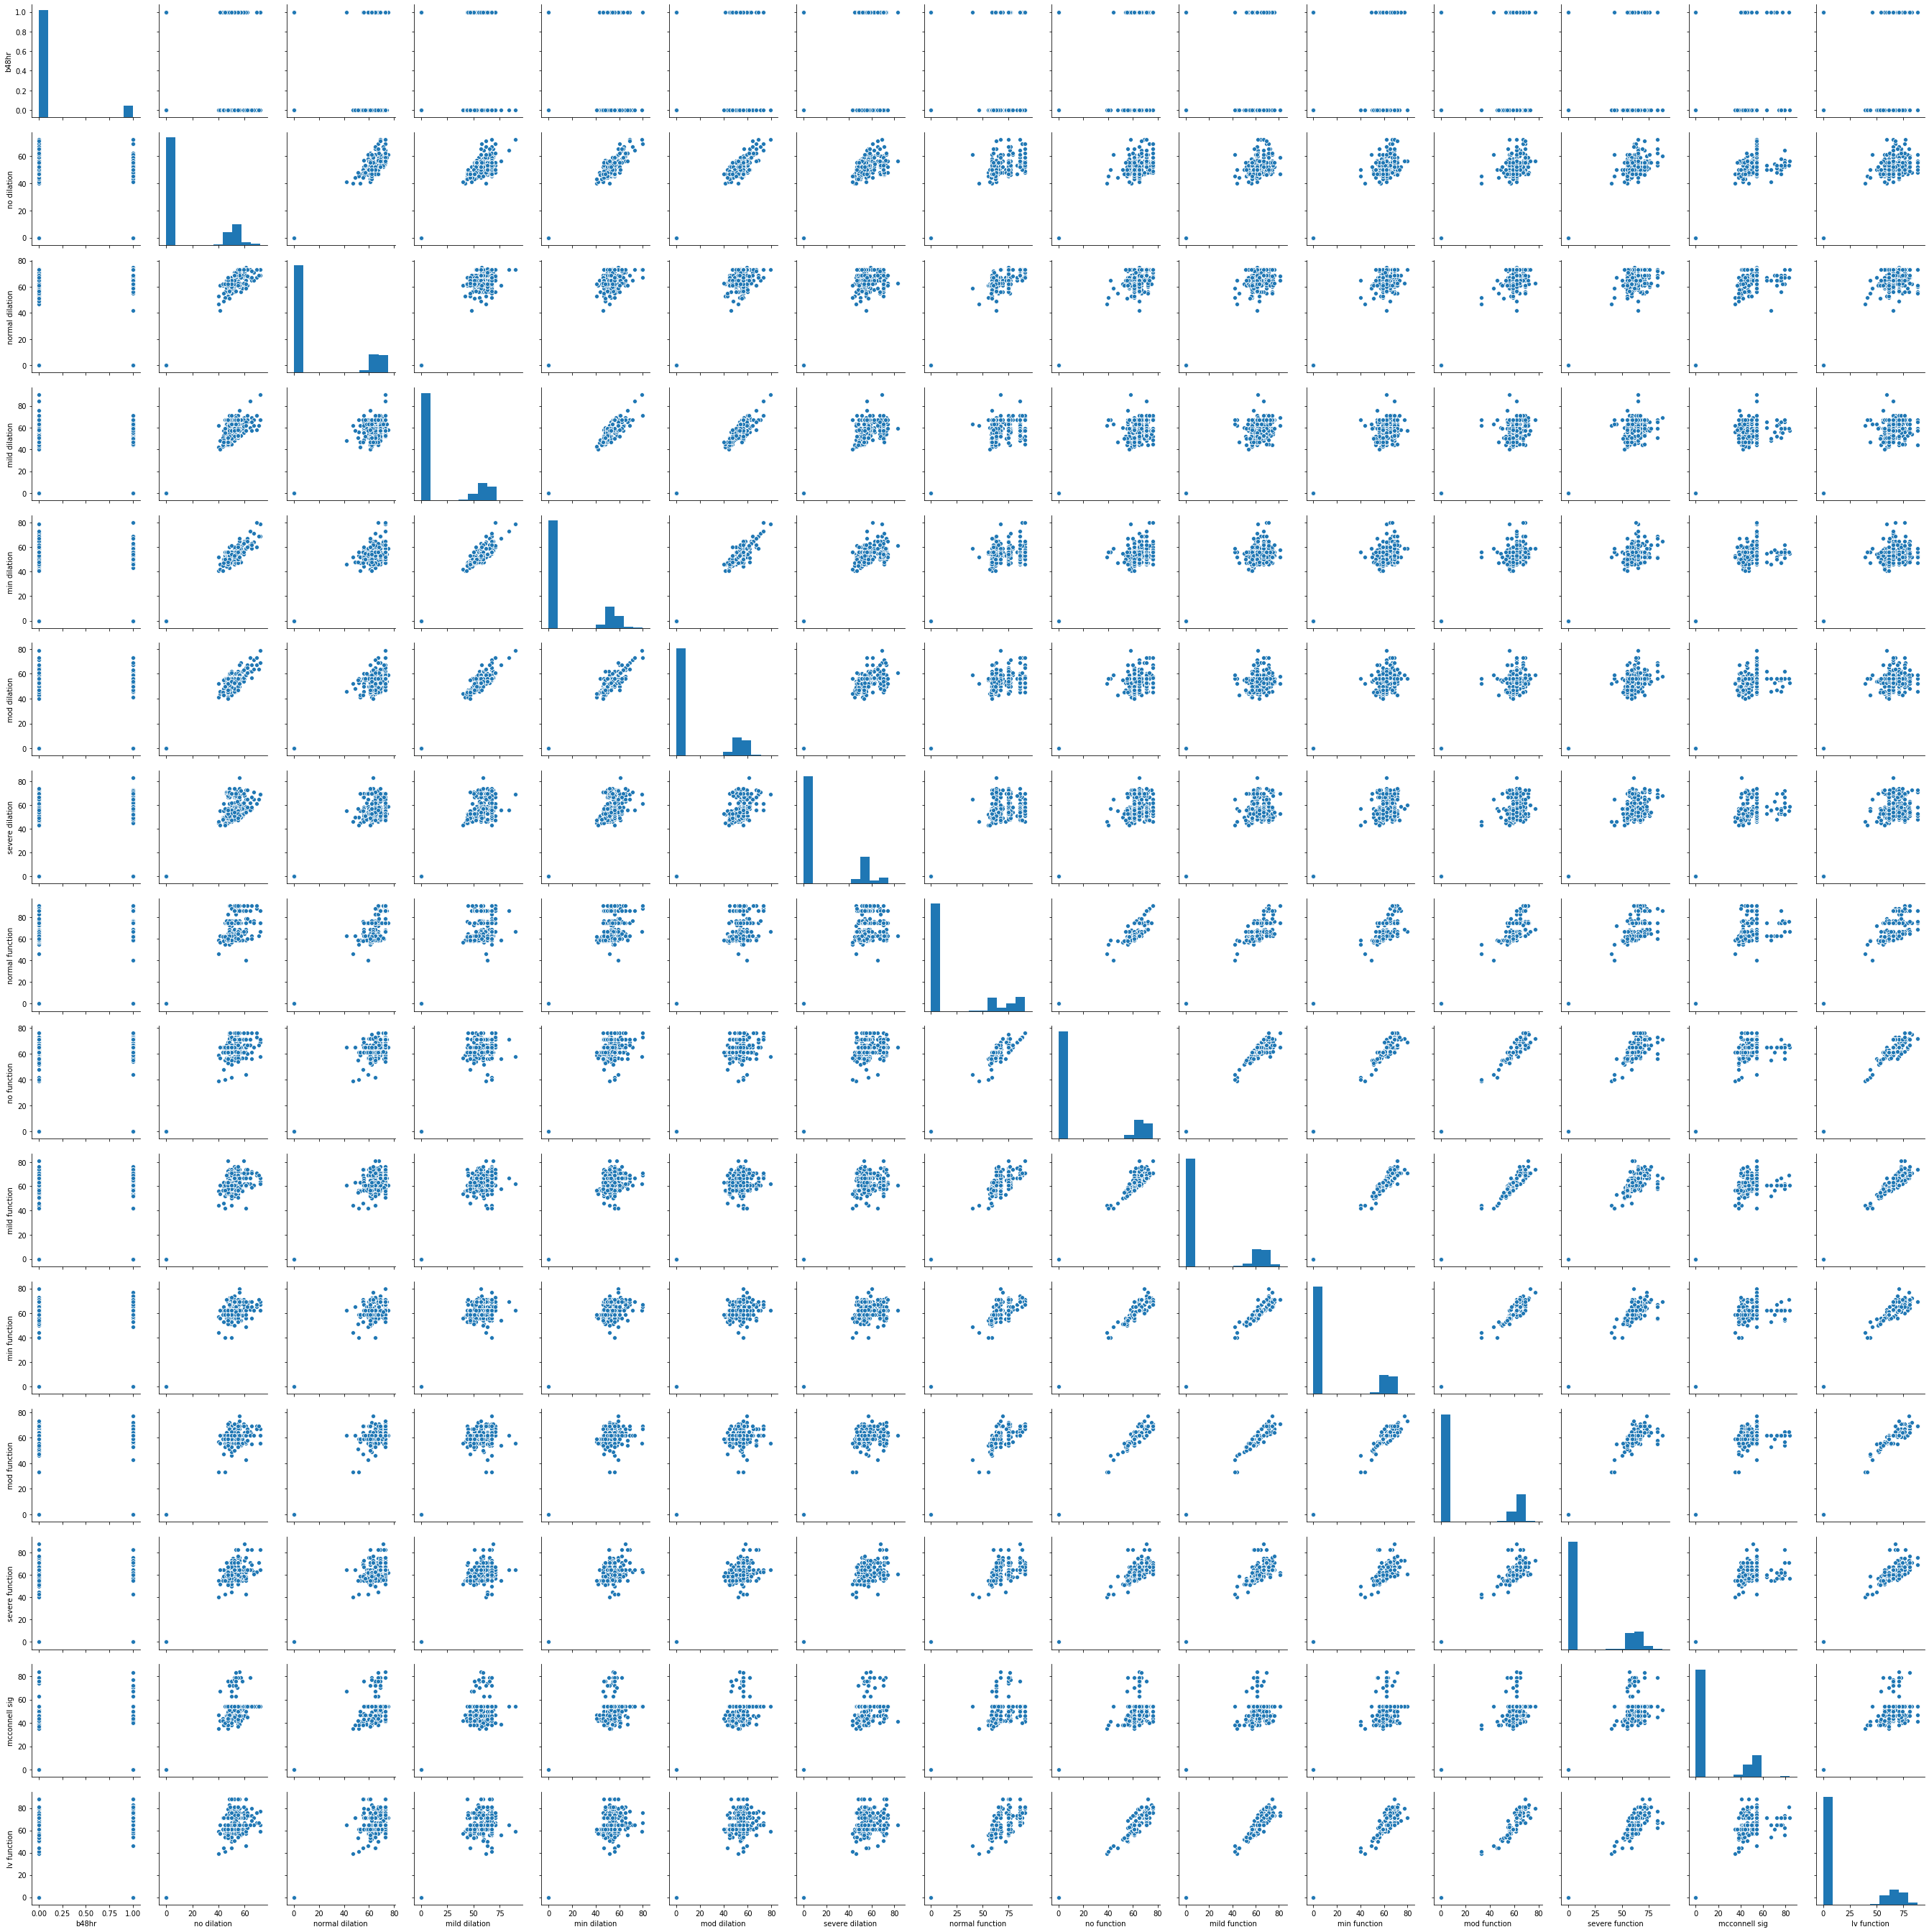

In [106]:
sns.pairplot(dfPlot)